In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import *
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
import datetime
import logging
import itertools
import numpy as np

In [3]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [48]:
# logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
# logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore


In [4]:
data = pd.read_csv('data/sanders_scores.csv')
data[pd.isnull(data['Comment'])] = ""
def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y')
def to_filter(text):
    terms = ['Bernie', 'Sanders', 'Mr.Sanders']
    if any(word in text for word in terms):
        return text
    else:
        return None 
    
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data2['new_date'] = data2['date'].apply(lambda x : unix_convert(x))
#data2['new_date'] = data2['new_date'].astype(int)
print data2['new_date'].value_counts()

list_ = data2['new_date'].unique()
list_

text_count = []
for i in list_:
    print i
    text_count.append(data2.ix[data2['new_date'] == i]['Comment'])

2434
2015    2014
2010     182
2012     149
2014      41
2011      38
2013      10
dtype: int64
2010
2011
2012
2014
2015
2013


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
def nested_sum(text_list) :
    total = []
    if len(text_list) == 1:
        for l in text_list:
            total.append(l)
    else:
        total2 = []
        for l in text_list:
            #print "list N!"
            for item in l:
                #print 'adding'
                total2.append(item)
        total.append(total2)
    
    return total

In [12]:
#content = nested_sum(text_count[:2])[0]

### NMF

In [75]:
# topics = []

# for i in range(len(text_count)):
#     keyterms = []
#     print i
#     vectorizer = TfidfVectorizer(stop_words='english')
#     content = nested_sum(text_count[:i+1])[0]
#     V = vectorizer.fit_transform(item for item in content).toarray() 
#     features = vectorizer.get_feature_names()
#     nmf = NMF(n_components=5).fit(V)
#     #i+1
#     for topic_idx, topic in enumerate(nmf.components_, 1):
#         keyterms.append(" ".join([features[i]
#                         for i in topic.argsort()[:-10 -1:-1]]))
#     print keyterms
    
# topics.append(keyterms)  

In [117]:
topics = []

for i in range(len(text_count)):
    keyterms = []
    print i
    vectorizer = TfidfVectorizer(stop_words='english')
    #content = nested_sum(text_count[:i])[0]
    V = vectorizer.fit_transform(text_count[i].values).toarray() 
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=5).fit(V)
    #i+1
    for topic_idx, topic in enumerate(nmf.components_, 1):
        keyterms.append(" ".join([features[i]
                        for i in topic.argsort()[:-10 -1:-1]]))
    print keyterms
    
topics.append(keyterms)  

0
[u'hillary people president like just clinton email think don woman', u'times coverage sanders clinton nyt articles ms news new sullivan', u'sanders bernie hillary candidate democratic socialist media support issues polls', u'republican trump clinton party mr wehner candidates mrs republicans field', u'biden joe run hillary president warren democratic win vote clinton']
1
[u'bernie sanders vote hillary democratic party win clinton candidate democrats', u'trump bush donald hillary republican jeb kasich gop candidates clinton', u'clinton email server times state private emails mrs classified government', u'biden joe run president hillary obama vice clinton good man', u'black change people lives matter laws blm white clinton hearts']
2
[u'bernie sanders support hillary democratic vote win nomination party clinton', u'times story clinton york new page news ny mrs email', u'government brooks clinton energy power tax wage class economy change', u'nyt clinton story news readers page apology

In [57]:
counts = pd.DataFrame(data2['new_date'].value_counts()).reset_index()
counts.columns = ['new_date', 'count']
counts.sort('new_date', inplace=True)
counts['new_date'].value_counts()
print counts
counts.loc[-1] = np.array(['2015-10', 2014])
print counts

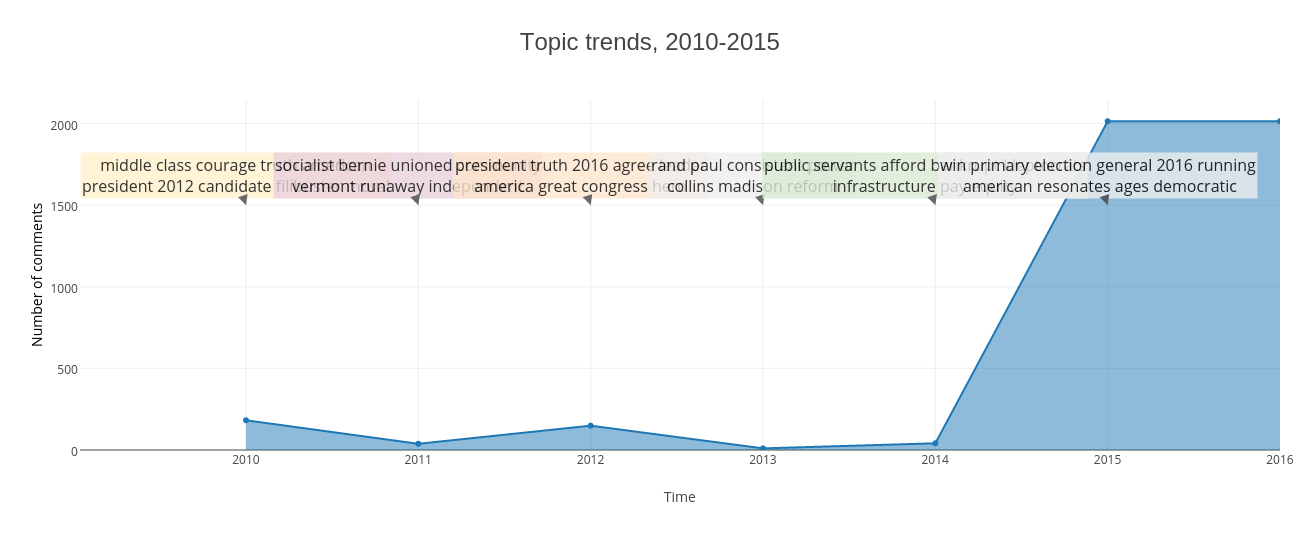

In [17]:
trace1 = Scatter(
        x=counts['new_date'],
        y=counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    title='Topic trends, 2010-2015',
    titlefont=Font(
            family='Arial, sans-serif',
            size=24),
    
    showlegend=False,
    xaxis=XAxis(
        title='Time',
    ),
    
    annotations=Annotations([

        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2010',
            y=1500,
            xref='x',
            yref='y',
            text='middle class courage truth american<br>president 2012 candidate filibuster moral',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2011',
            y=1500,
            xref='x',
            yref='y',
            text='socialist bernie unioned community<br>vermont runaway independent',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EAD1DC',
            opacity=0.8
        ),
        
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2012',
            y=1500,
            xref='x',
            yref='y',
            text='president truth 2016 agree leader<br>america great congress hero',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FCE5CD',
            opacity=0.8
        ),
            
    Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2013',
            y=1500,
            xref='x',
            yref='y',
            text='rand paul consistent power<br>collins madison reform',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EEEEEE',
            opacity=0.8
        ),
          
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2014',
            y=1500,
            xref='x',
            yref='y',
            text='public servants afford bankrupt kleptocrats<br>infrastructure pay equity',
            showarrow=True,
            arrowhead=2,
            bgcolor='#D9EAD3',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015',
            y=1500,
            xref='x',
            yref='y',
            text='win primary election general 2016 running<br> american resonates ages democratic',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EEEEEE',
            opacity=0.8
        ),
        
        
        
        ]),
    
    width=1300,
    height=550,
    
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=20,      #   right,  
        l=80#   left
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Open Sans',
            size=14,
            color='#000000'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_time')

In [20]:
data = pd.read_csv('data/trump_scores.csv')
data[pd.isnull(data['Comment'])] = ""
def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')
def to_filter(text):
    terms = ['Trump', 'Donald', 'Mr.Trump']
    if any(word in text for word in terms):
        return text
    else:
        return None 
    
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data2['new_date'] = data2['date'].apply(lambda x : unix_convert(x))
#data2['new_date'] = data2['new_date'].astype(int)
print data2['new_date'].value_counts()

list_ = data2['new_date'].unique()
print list_

text_count = []
for i in list_:
    print i
    text_count.append(data2.ix[data2['new_date'] == i]['Comment'])

15329
2015-08    8516
2015-09    4431
2015-07    2382
dtype: int64
['2015-07' '2015-08' '2015-09']
2015-07
2015-08
2015-09


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
counts = pd.DataFrame(data2['new_date'].value_counts()).reset_index()
counts.columns = ['new_date', 'count']
counts.sort('new_date', inplace=True)
#counts['new_date'].value_counts()
#counts['new_date'] = counts['new_date'].astype(int)
#counts = counts[counts['new_date'] > 2012]
counts

,new_date,count
2,2015-07,2382
0,2015-08,8516
1,2015-09,4431


In [22]:
counts['new_date'] = counts['new_date'].astype(str)
counts.loc[-1] = np.array(['2015-10', 4431])
counts

,new_date,count
2,2015-07,2382
0,2015-08,8516
1,2015-09,4431
-1,2015-10,4431


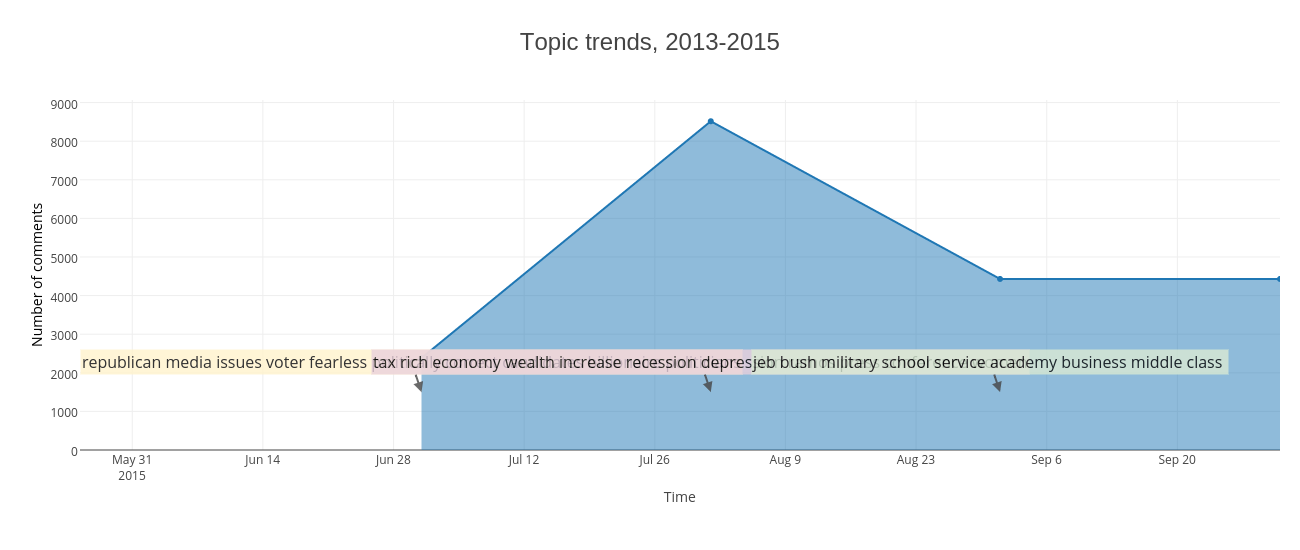

In [23]:
trace1 = Scatter(
        x=counts['new_date'],
        y=counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    title='Topic trends, 2013-2015',
    titlefont=Font(
            family='Arial, sans-serif',
            size=24),
    
    showlegend=False,
    xaxis=XAxis(
        title='Time',
    ),
    
    annotations=Annotations([

        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-07',
            y=1500,
            xref='x',
            yref='y',
            text='republican media issues voter fearless politically correct candidates billionaire politicians',
            showarrow=True,
            arrowhead=2,
            bgcolor='#FFF2CC',
            opacity=0.8
        ),
            
        Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-08',
            y=1500,
            xref='x',
            yref='y',
            text='tax rich economy wealth increase recession depression ramos press conference women',
            showarrow=True,
            arrowhead=2,
            bgcolor='#EAD1DC',
            opacity=0.8
        ),
        
      Annotation(
            font=Font(
            family='Open Sans',
            size=16,
            color='#000000'
            ),
                
            x='2015-09',
            y=1500,
            xref='x',
            yref='y',
            text='jeb bush military school service academy business middle class ',
            showarrow=True,
            arrowhead=2,
            bgcolor='#D9EAD3',
            opacity=0.8
        ),
            

        ]),
    
    width=1300,
    height=550,
    
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=20,      #   right,  
        l=80#   left
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Open Sans',
            size=14,
            color='#000000'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_time')